In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Analysis of Central Government Debt across countries of different income levels

#### Data Cleaning


In [19]:
#read data
file_path=r"C:\Users\User\Desktop\Global Debt Database\central_government_debt.csv"
central_govdebt=pd.read_csv(file_path,encoding='latin1')

In [20]:
tidy_df = pd.melt(central_govdebt, id_vars=['country_name', 'indicator_name'], var_name='year', value_name='debt_value')

In [21]:
tidy_df.head()

,country_name,indicator_name,year,debt_value
0,Afghanistan,Annual average of central government debt (Per...,1950,NaN
1,Albania,Annual average of central government debt (Per...,1950,NaN
2,Algeria,Annual average of central government debt (Per...,1950,NaN
3,Angola,Annual average of central government debt (Per...,1950,NaN
4,Antigua and Barbuda,Annual average of central government debt (Per...,1950,NaN


In [22]:
#Filter out to include only sample countries
countries=['Chad','Niger','Burkina Faso','Sri Lanka','Bolivia','Kenya','Mexico','Russian Federation',
           'Indonesia','Saudi Arabia','Germany','United States']

In [23]:
tidy_df=tidy_df[tidy_df['country_name'].isin(countries)]

In [24]:
tidy_df['country_name'].value_counts()

country_name
Bolivia               73
Burkina Faso          73
Chad                  73
Germany               73
Indonesia             73
Kenya                 73
Mexico                73
Niger                 73
Russian Federation    73
Saudi Arabia          73
Sri Lanka             73
United States         73
Name: count, dtype: int64

In [25]:
#now we drop columns of years outside our range of interest-2010-2022
tidy_df=tidy_df.drop(tidy_df.iloc[:,2:62].columns, axis=1, inplace=False)

In [26]:
tidy_df.head()

,country_name,indicator_name
19,Bolivia,Annual average of central government debt (Per...
25,Burkina Faso,Annual average of central government debt (Per...
31,Chad,Annual average of central government debt (Per...
57,Germany,Annual average of central government debt (Per...
71,Indonesia,Annual average of central government debt (Per...


## Dealing with missing values

In [122]:
#checking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 164
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    12 non-null     object 
 1   indicator_name  12 non-null     object 
 2   2010            12 non-null     float64
 3   2011            12 non-null     float64
 4   2012            12 non-null     float64
 5   2013            12 non-null     float64
 6   2014            12 non-null     float64
 7   2015            12 non-null     float64
 8   2016            12 non-null     float64
 9   2017            12 non-null     float64
 10  2018            12 non-null     float64
 11  2019            12 non-null     float64
 12  2020            12 non-null     float64
 13  2021            10 non-null     float64
 14  2022            10 non-null     float64
dtypes: float64(13), object(2)
memory usage: 1.5+ KB


##### This shows there are only 2 missing values in each column of '21 and '22

In [123]:
#To determine imputation method-deciding between mean and median imputation, check distribution of data
afghan=data.loc[data['country_name']=='Afghanistan']


In [124]:
afghan

,country_name,indicator_name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Annual average of central government debt (Per...,7.696949,7.501084,6.759468,6.904479,8.700291,9.154083,8.437266,7.99766,7.384413,6.13041,7.397495,NaN,NaN


In [125]:
new_df=afghan.transpose()

In [126]:
new_df.head()

,0
country_name,Afghanistan
indicator_name,Annual average of central government debt (Per...
2010,7.696949
2011,7.501084
2012,6.759468


In [127]:
new_df= new_df.drop(['country_name', 'indicator_name'])

In [128]:
#now my columns are unnamed
new_df = new_df.rename(columns={0:'Debt'})

In [129]:
new_df

,Debt
2010,7.696949
2011,7.501084
2012,6.759468
2013,6.904479
2014,8.700291
2015,9.154083
2016,8.437266
2017,7.99766
2018,7.384413
2019,6.13041


C:\Users\User\AppData\Local\Temp\ipykernel_9040\203979295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df.Debt)


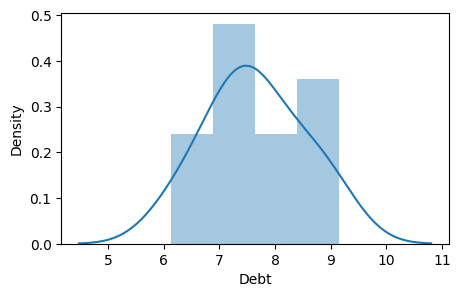

In [130]:
fig,ax=plt.subplots(figsize=(5,3))
sns.distplot(new_df.Debt)

plt.show()

### From the distribution plot, the data has a normal distribution with no skew. In this case, mean imputation is the best technique to use to deal with missing values.

In [131]:
#mean=new_df['Debt'].mean()
new_df['Debt'] = new_df['Debt'].fillna(new_df['Debt'].mean())


C:\Users\User\AppData\Local\Temp\ipykernel_9040\1742545688.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Debt'] = new_df['Debt'].fillna(new_df['Debt'].mean())


In [132]:
new_df.tail()

,Debt
2018,7.384413
2019,6.130410
2020,7.397495
2021,7.642145
2022,7.642145


In [133]:
data=data.transpose()

In [134]:
data.head()

,0,19,25,26,57,71,81,101,125,132,144,164
country_name,Afghanistan,Bolivia,Burkina Faso,Burundi,Germany,Indonesia,Kenya,Mexico,Russian Federation,Saudi Arabia,Sri Lanka,United States
indicator_name,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...,Annual average of central government debt (Per...
2010,7.696949,34.407332,27.819274,46.911653,52.143191,24.429159,36.69467,26.895416,8.380489,8.425991,68.730764,73.647275
2011,7.501084,30.223498,22.465937,42.70571,50.003304,23.097718,35.687277,27.656842,8.888445,5.340152,69.428037,78.528166
2012,6.759468,29.08793,23.221972,41.430492,50.645537,22.95471,37.616243,28.151823,9.573531,3.01229,67.503913,82.79118


In [135]:
data= data.drop('indicator_name')

In [136]:
data.head()

,0,19,25,26,57,71,81,101,125,132,144,164
country_name,Afghanistan,Bolivia,Burkina Faso,Burundi,Germany,Indonesia,Kenya,Mexico,Russian Federation,Saudi Arabia,Sri Lanka,United States
2010,7.696949,34.407332,27.819274,46.911653,52.143191,24.429159,36.69467,26.895416,8.380489,8.425991,68.730764,73.647275
2011,7.501084,30.223498,22.465937,42.70571,50.003304,23.097718,35.687277,27.656842,8.888445,5.340152,69.428037,78.528166
2012,6.759468,29.08793,23.221972,41.430492,50.645537,22.95471,37.616243,28.151823,9.573531,3.01229,67.503913,82.79118
2013,6.904479,28.298954,23.7846,37.857602,49.539723,24.884419,39.755673,30.761159,11.058048,2.127267,69.456928,85.13749


In [137]:
data.head()

,0,19,25,26,57,71,81,101,125,132,144,164
country_name,Afghanistan,Bolivia,Burkina Faso,Burundi,Germany,Indonesia,Kenya,Mexico,Russian Federation,Saudi Arabia,Sri Lanka,United States
2010,7.696949,34.407332,27.819274,46.911653,52.143191,24.429159,36.69467,26.895416,8.380489,8.425991,68.730764,73.647275
2011,7.501084,30.223498,22.465937,42.70571,50.003304,23.097718,35.687277,27.656842,8.888445,5.340152,69.428037,78.528166
2012,6.759468,29.08793,23.221972,41.430492,50.645537,22.95471,37.616243,28.151823,9.573531,3.01229,67.503913,82.79118
2013,6.904479,28.298954,23.7846,37.857602,49.539723,24.884419,39.755673,30.761159,11.058048,2.127267,69.456928,85.13749


In [138]:
data.tail()

,0,19,25,26,57,71,81,101,125,132,144,164
2018,7.384413,35.315719,38.212026,52.971095,39.657728,29.775407,56.448928,35.349966,12.917723,17.633066,83.584943,90.962795
2019,6.13041,40.20496,42.044704,59.988308,37.793744,30.181921,59.084646,36.128476,13.163881,21.550935,82.594028,93.073615
2020,7.397495,57.827805,44.869579,65.965544,44.841973,39.334463,67.834734,41.408354,18.495516,31.040182,95.695081,118.420751
2021,NaN,62.734143,48.209273,66.566301,46.639606,40.696211,66.967592,41.46058,NaN,28.797124,102.242045,113.705197
2022,NaN,67.680373,54.30862,68.3002,45.949315,39.482407,67.936193,40.858075,NaN,22.572861,117.661325,110.146803


In [139]:
data[[]]=data.fillna(data.mean())

TypeError: can only concatenate str (not "float") to str